In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
path = '../epitomes'
pattern = '\d+'
chars = []
tokens = []
epitome_numbers = []

for file in sorted(os.listdir(path)):
    with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
        epitome_numbers.append(int(re.search(pattern, file).group()))
        text = f.read()
        chars.append(len(text))
        text_tokens = text.split()
        tokens.append(len(text_tokens))

In [5]:
total_chars = sum(chars)
avg_chars = total_chars/len(chars)
std_chars = np.std(chars)
total_tokens = sum(tokens)
avg_tokens = total_tokens/len(tokens)

# window_size = 10
# i = 0
# moving_avg_tokens = []

# while i < len(tokens) - window_size + 1:
    
#     window = tokens[i: i + window_size]
#     window_avg = sum(window)/window_size
#     moving_avg_tokens.append(window_avg)
#     i += 1

print('CHARACTERS')
print(f'Total characters in BoB: {total_chars:.2f}')
print(f'Mean characters per epitome: {avg_chars:.2f}')
print(f'Standard deviation of characters in BoB: {std_chars:.2f}')
print('TOKENS')
print(f'Total tokens in BoB: {total_tokens}')
print(f'Mean tokens per epitome: {avg_tokens:.2f}')

CHARACTERS
Total characters in BoB: 2356562.00
Mean characters per epitome: 1664.24
Standard deviation of characters in BoB: 3152.98
TOKENS
Total tokens in BoB: 326703
Mean tokens per epitome: 230.72


In [6]:
window_size = 50
chars_df = pd.DataFrame(chars)
rolling_chars_df = chars_df.rolling(window_size, min_periods=1).mean()

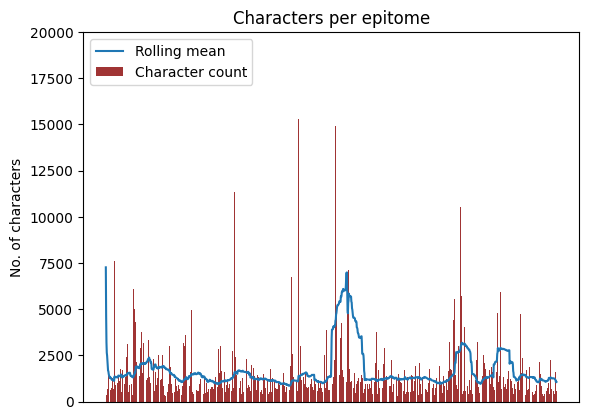

In [12]:
fig, ax = plt.subplots()

sns.barplot(x=list(range(len(chars))), y=chars, ax=ax, color='firebrick', label='Character count')
ax.set_ylim(0, 20000)
ax.set_xticks([])
ax.set_title('Characters per epitome')
sns.lineplot(x=rolling_chars_df.index, y=rolling_chars_df[0], ax=ax, label='Rolling mean')
ax.set_ylabel('No. of characters');

In [13]:
# this epitome is by far the longest
epitome_numbers[np.argmax(chars)]

1450

In [14]:
min_chars = min(chars)
max_chars = max(chars)
mean_chars = np.mean(chars)
median_chars = np.median(chars)
min_tokens = min(tokens)
max_tokens = max(tokens)
mean_tokens = np.mean(tokens)
median_tokens = np.median(tokens)
# the shortest epitomes are 146 and 147 - they both have less than 20 tokens

In [15]:
print(f'The min and max characters are {min_chars} and {max_chars}, respectively.')
print(f'The character mean and median are {mean_chars:.2f} and {median_chars}, respectively.')
print(f'The min and max tokens are {min_tokens} and {max_tokens}, respectively.')
print(f'The token mean and median are {mean_tokens:.2f} and {median_tokens}, respectively.')

The min and max characters are 115 and 61058, respectively.
The character mean and median are 1664.24 and 993.0, respectively.
The min and max tokens are 14 and 8481, respectively.
The token mean and median are 230.72 and 136.0, respectively.


In [16]:
char_bins = [0, 250, 500, 1000, 1500, 2000, 3000, 5000, 10000, 100000]
char_hist, bin_edges = np.histogram(chars, char_bins)
token_bins = [0, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
token_hist, bin_edges = np.histogram(tokens, token_bins)

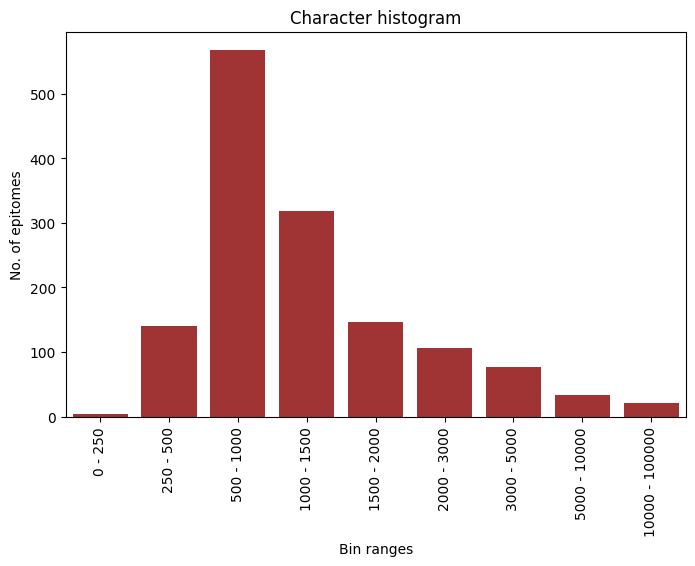

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.barplot(char_hist, color='firebrick', ax=ax)
xtick_labels = [f'{char_bins[i]} - {char_bins[i+1]}' for i in range(len(char_hist))]
ax.set_xticks(range(len(char_bins)-1), xtick_labels, rotation=90)
ax.set_xlabel('Bin ranges')
ax.set_ylabel('No. of epitomes')
ax.set_title('Character histogram');

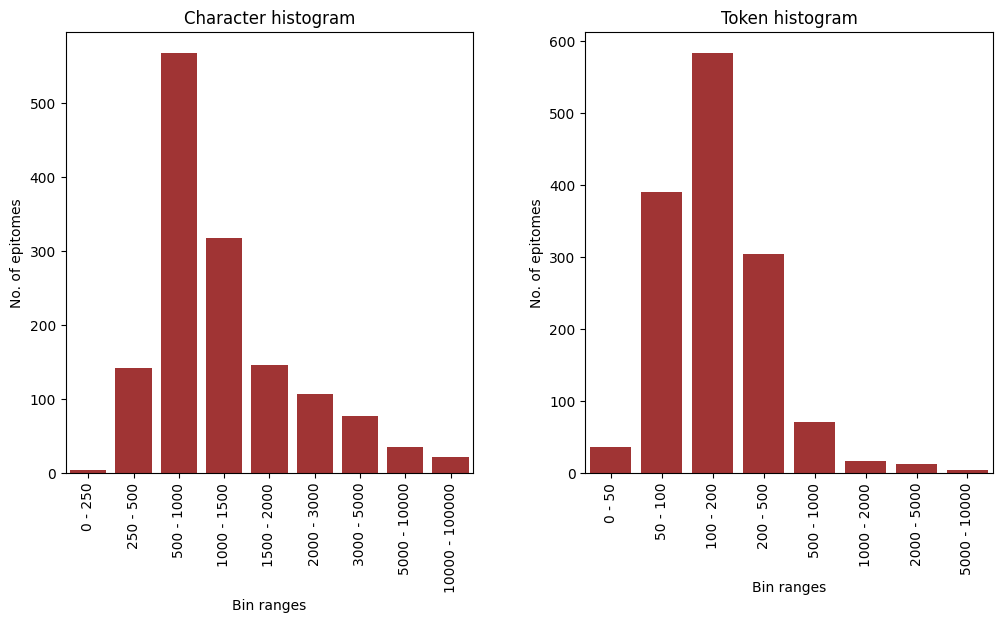

In [21]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
fig.tight_layout(w_pad=5)
sns.barplot(char_hist, color='firebrick', ax=axes[0])
xtick_labels = [f'{char_bins[i]} - {char_bins[i+1]}' for i in range(len(char_hist))]
axes[0].set_xticks(range(len(char_bins)-1), xtick_labels, rotation=90)
axes[0].set_xlabel('Bin ranges')
axes[0].set_ylabel('No. of epitomes')
axes[0].set_title('Character histogram')

sns.barplot(token_hist, color='firebrick', ax=axes[1])
xtick_labels = [f'{token_bins[i]} - {token_bins[i+1]}' for i in range(len(token_hist))]
axes[1].set_xticks(range(len(token_bins)-1), xtick_labels, rotation=90)
axes[1].set_xlabel('Bin ranges')
axes[1].set_ylabel('No. of epitomes')
axes[1].set_title('Token histogram');